## Double pendulums 

From taylor 11.37, the total potential energy is 

$\begin{align}
  U(\phi_1, \phi_2 = -(m_1 + m_2) g L_1 (1 - cos\phi_1) - m_2 g L_2 (1 - cos\phi_2)
\end{align}$

From taylor 11.38, the total kinetic energy is 

$\begin{align}
 T = \frac{1}{2}(m_1+m_2)L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1^2 \dot\phi_2^2 cos(\phi_1 - \phi_2) + \frac{1}{2}m_2 L_2^2 \dot\phi_2^2
\end{align}$

The Lagrangian is L = T -U

$\begin{align}
  L = \frac{1}{2}(m_1+m_2)L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1^2 \dot\phi_2^2 cos(\phi_1 - \phi_2) + \frac{1}{2}m_2 L_2^2 \dot\phi_2^2 + (m_1 + m_2) g L_1 (1 - cos\phi_1) + m_2 g L_2 (1 - cos\phi_2)
  \end{align}$
  
The Euler-Langrange equation is 

$\begin{align}
\frac{d}{dt}(\frac{\partial\mathcal{L}}{\partial \dot\phi_i})-\frac{\partial\mathcal{L}}{\partial \dot\phi_i} = 0 \; 
    For \phi_i = \phi_1, \phi_2.
\end{align}$

After calculations:

$\begin{align}
    0 = (m_1+m_2)L_1^2 \ddot\phi_1^2 + m_2 L_2 \ddot\phi_2^2 cos(\phi_1 - \phi_2) + m_2 L_2 \dot\phi_2^2 sin(\phi_1 - \phi_2) + (m_1+m_2) g sin\phi_1
\end{align}$

$\begin{align}
    0 = m_2 L_2 \ddot\phi_2^2 + m_2 L_2 \ddot\phi_1 cos(\phi_1 - \phi_2) - m_2 L_1 \dot\phi_1^2 sin(\phi_1 - \phi_2) + m_2 g sin\phi_2
\end{align}$

The final result is

$\begin{align}
\ddot\phi_1 = \frac{m_2 g sin\phi_2 cos(\phi_1 - \phi_2) - m_2 sin(\phi_1 - \phi_2)(L_1 \dot\phi_1^2 cos(\phi_1 - \phi_2) + L_2 \dot\phi_2^2) - (m_1+m_2) g sin\phi_1}{L_1 (m_1+m_2 sin^2(\phi_1 - \phi_2))}
\end{align}$

$\begin{align}
\ddot\phi_2 = \frac{(m_1+m_2)(L_1 \dot\phi_1^2 sin(\phi_1 - \phi_2) - g sin\phi_2 + g sin\phi_1 + g sin\phi_1 cos(\phi_1 - \phi_2)) + m_2 L_2 \dot\phi_2^2 sin(\phi_1 - \phi_2) cos(\phi_1 - \phi_2)}
{L_2 (m_1+m_2 sin^2(\phi_1 - \phi_2))}
\end{align}$

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

In [3]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mn : float
        mass of pendulum bob, where n is the pendulum bob number
        
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2= 1., mass1=1., mass2 = 1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
         [dtheta1/dt dtheta_dot/dt dtheta2/dt dtheta2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = theta1 and y[1] = dtheta1_dot
            y[2] = theta2 and y[3] = dtheta2_dot
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 =y
        c, s = np.cos(theta1 -theta2), np.sin(theta1 - theta2)
        demon = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m2*self.g*np.sin(theta2)* c \
                 - self.m2*s*(self.L1*z1**2*c+self.L2*z2**2) \
                  - (self.m1+self.m2)*self.g*np.sin(theta1)) \
                    / self.L1 / demon
        theta2_dot = z2
        z2_dot = ((self.m1+self.m2)*(self.L1*z1**2 *s \
                 - self.g*np.sin(theta2)+self.g*np.sin(theta1)*c) 
                  +self.m2*self.L2*z2**2*s*c)\
                    / self.L2 / demon
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot
    
    def calc_E(y):
        """ Return the total energy of the system."""
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
                                          2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T+V

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2= 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(L1=L1, L2=L2, mass1=mass1, g=g, mass2=mass2)


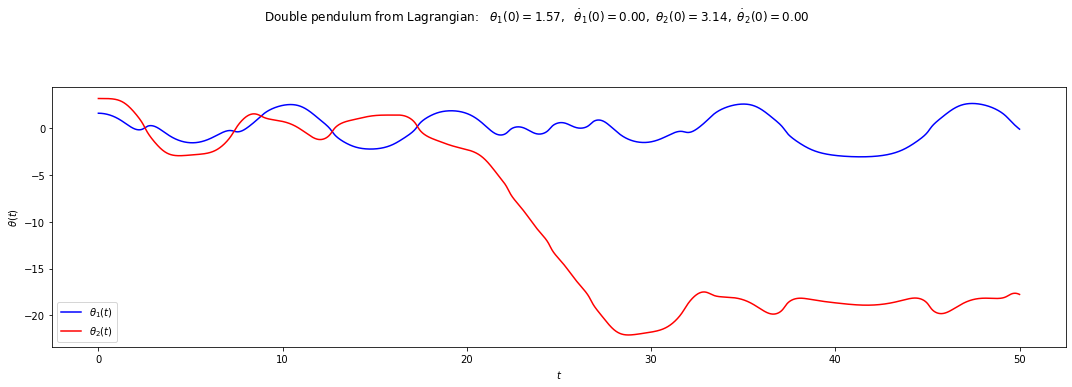

In [11]:
theta1_0 = np.pi / 2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)      
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels,
            color='blue',
            label=r'$\theta_1(t)$',  
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)

fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')

Now trying the power spectrum, plotting only positive frequencies and cutting off the lower peaks:

(1e-07, 2.0)

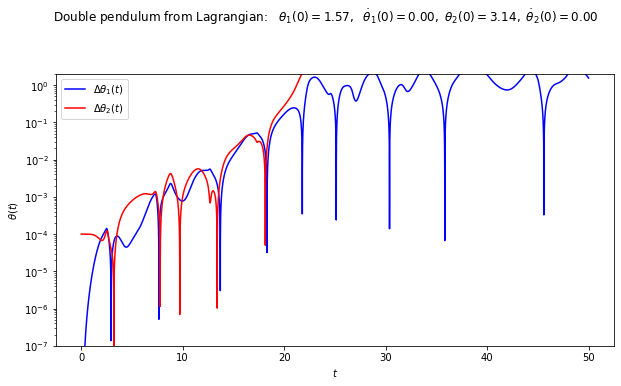

In [20]:
theta1_0 = np.pi / 2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

theta1b, theta1b_dot, theta2b, theta2b_dot = \
    p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.0001, theta2_dot_0)

fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf'  $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)      
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop] - theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels,
            color='blue', semilogy=True,
            label=r'$\Delta\theta_1(t)$',  
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop] - theta2b[start : stop]), 
            color='red', semilogy=True,
            label=r'$\Delta\theta_2(t)$', 
            ax=ax_a)

ax_a.set_ylim(1.e-7,2.)
